## EDA using Time Series Data 

Using Tesla stock price data

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [168]:
df = pd.read_csv('TSLA.CSV')

In [169]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [170]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0
757,2022-05-20,713.989990,721.580017,633.000000,663.900024,48190600,0,0.0


In [171]:
## We would only deal with the closing price for simpler anaysis

df.drop(['Open', 'High',	'Low',	'Volume',	'Dividends',	'Stock Splits'], axis=1, inplace=True)

In [172]:
df.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [174]:
## Converting the datatype of 'Date' to datetime 

df['Date'] = pd.to_datetime(df['Date'])

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [176]:
## Making the 'Date' column as the index column for convenience

df = df.set_index('Date')

In [177]:
df.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


In [178]:
df.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


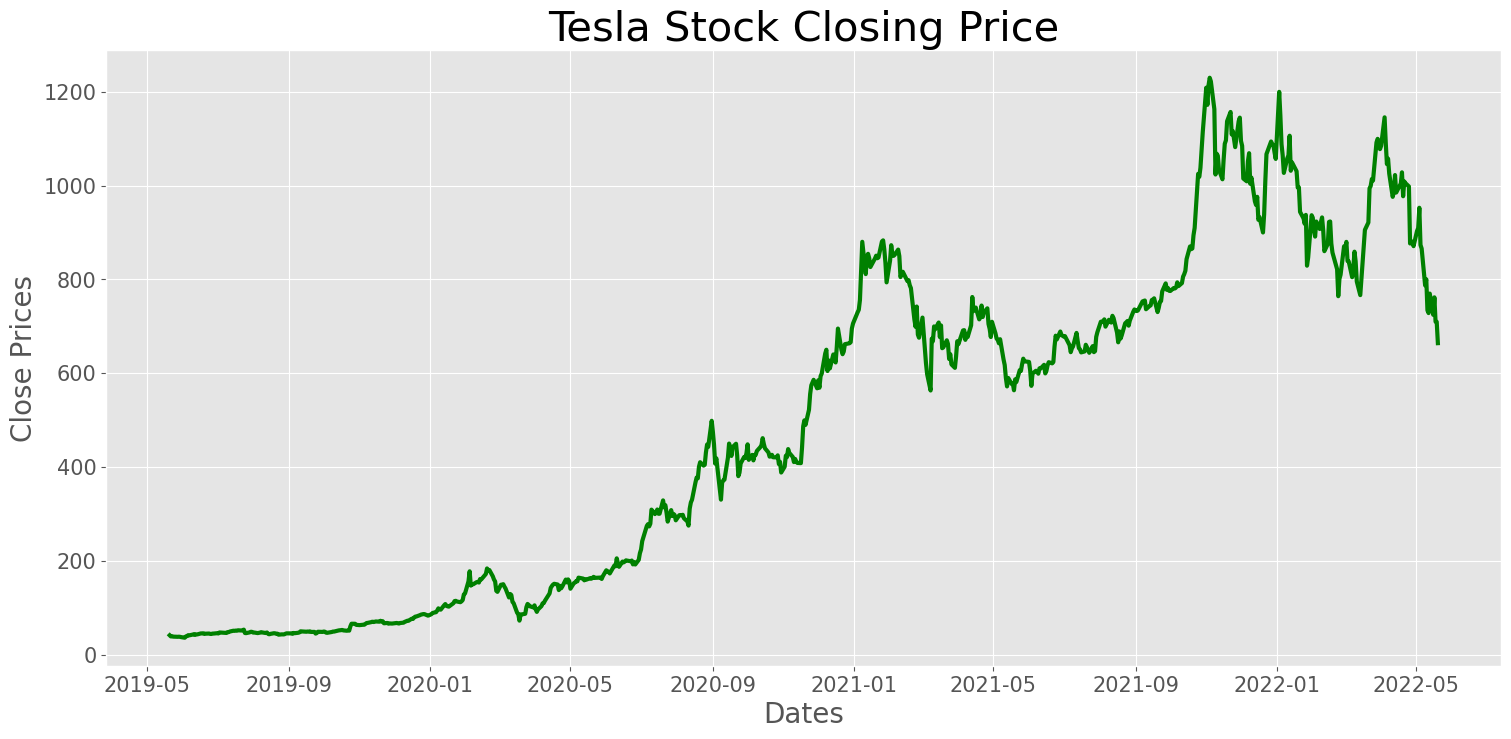

In [179]:
# Plotting close price

plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(df, linewidth = 3, color = 'green')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

We can clearly notice an upward trend in the close price over the time.

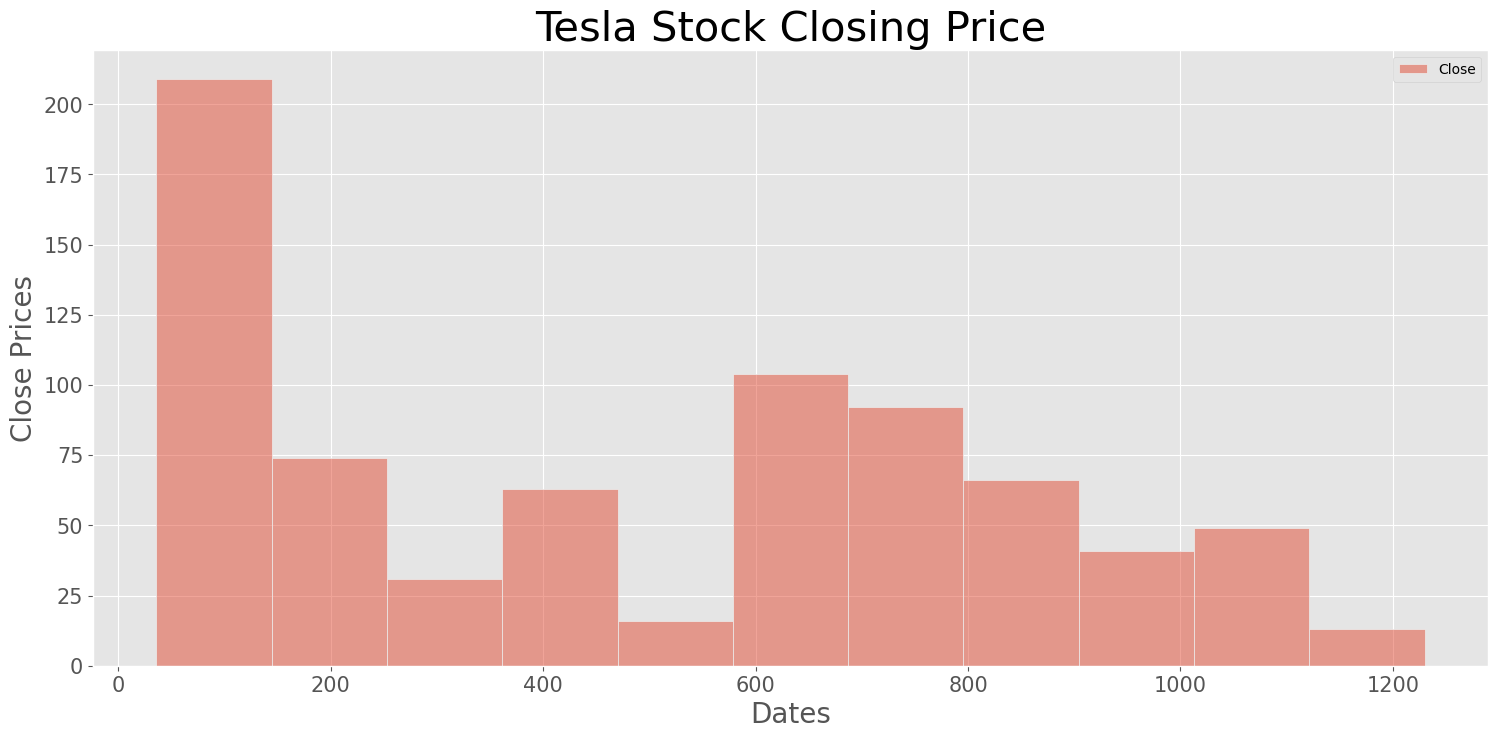

In [248]:
# Plotting histogram of the close price

plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
sns.histplot(df)
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

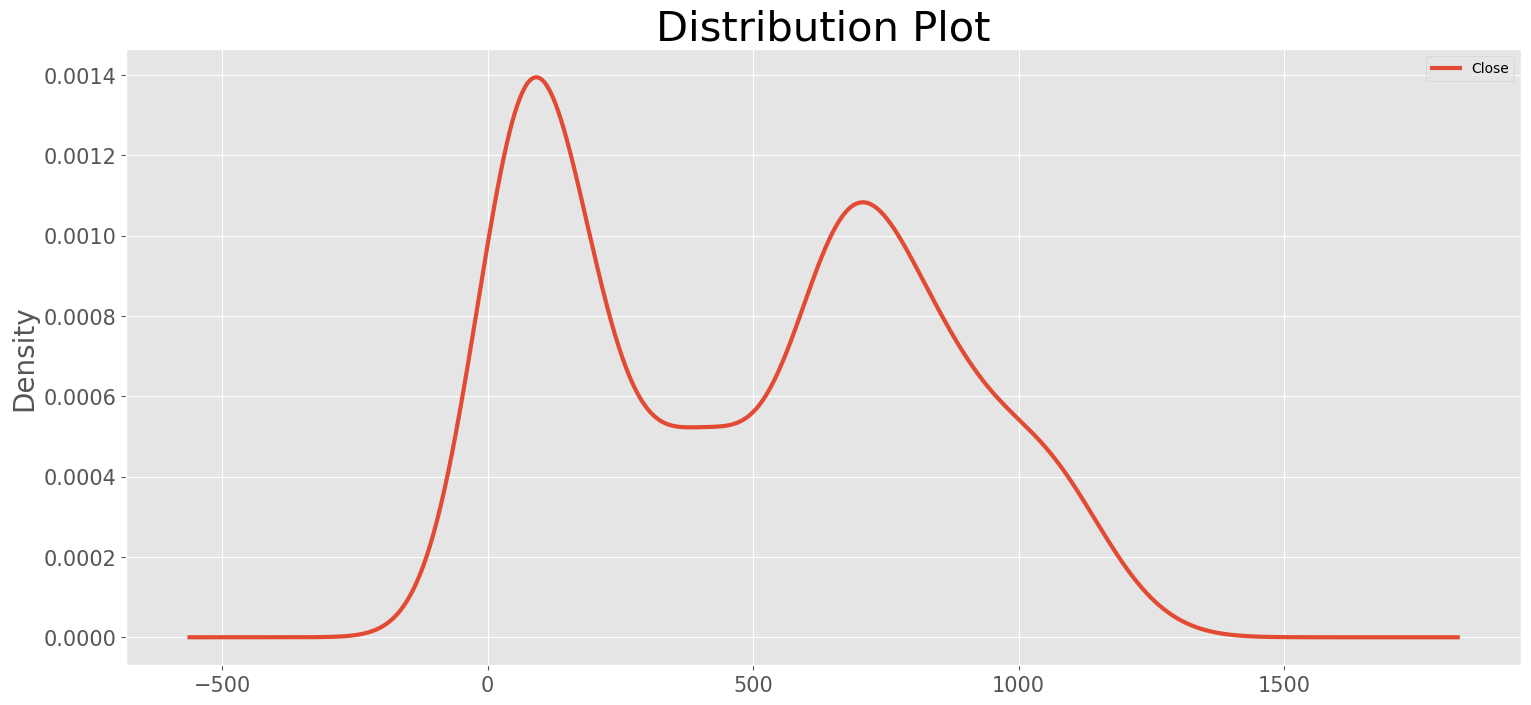

In [181]:
# Plotting the distribution of the close price  

df.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.title('Distribution Plot', fontsize=30)
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

                 Close
Date                  
2019-05-21         NaN
2019-05-22         NaN
2019-05-23         NaN
2019-05-24         NaN
2019-05-28         NaN
...                ...
2022-05-16  826.467504
2022-05-17  817.371668
2022-05-18  801.277501
2022-05-19  784.625000
2022-05-20  760.565002

[758 rows x 1 columns]


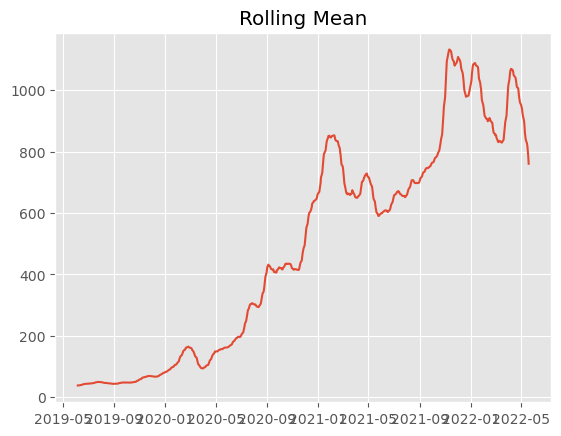

In [249]:
## Moving Average

rolling_mean = df.rolling(12).mean()
print(rolling_mean)
plt.title('Rolling Mean')
plt.plot(rolling_mean)

                 Close
Date                  
2019-05-21         NaN
2019-05-22         NaN
2019-05-23         NaN
2019-05-24         NaN
2019-05-28         NaN
...                ...
2022-05-16  915.815829
2022-05-17  914.226330
2022-05-18  912.364329
2022-05-19  911.453996
2022-05-20  909.172829

[758 rows x 1 columns]


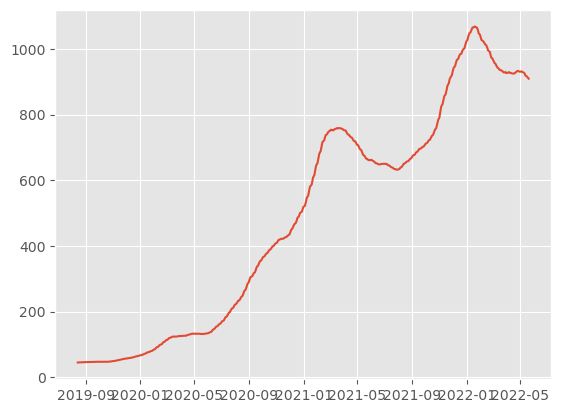

In [183]:
rolling_mean = df.rolling(60).mean()
print(rolling_mean)
plt.title('Rolling Mean')
plt.plot(rolling_mean)

                 Close
Date                  
2019-05-21         NaN
2019-05-22         NaN
2019-05-23         NaN
2019-05-24         NaN
2019-05-28         NaN
...                ...
2022-05-16  913.353397
2022-05-17  913.613097
2022-05-18  913.613447
2022-05-19  913.605947
2022-05-20  913.352297

[758 rows x 1 columns]


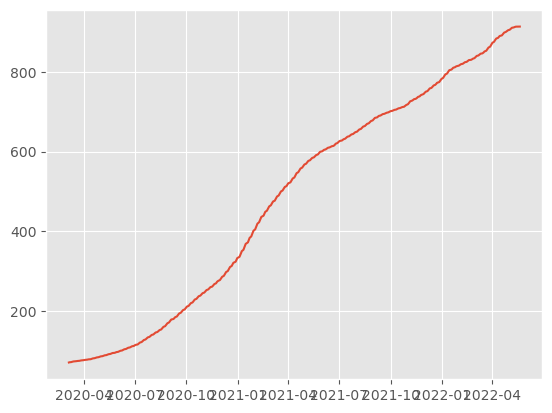

In [184]:
rolling_mean = df.rolling(200).mean()
print(rolling_mean)
plt.title('Rolling Mean')
plt.plot(rolling_mean)

We can notice that by increasing the window size, the Moving Average curve is getting smoother. 

                 Close
Date                  
2019-05-21         NaN
2019-05-22         NaN
2019-05-23         NaN
2019-05-24         NaN
2019-05-28         NaN
...                ...
2022-05-16  144.724260
2022-05-17  144.403170
2022-05-18  144.402673
2022-05-19  144.413292
2022-05-20  144.808543

[758 rows x 1 columns]


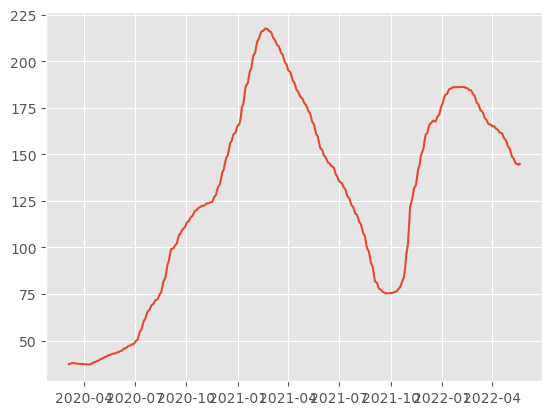

In [185]:
rolling_standard_deviation = df.rolling(200).std()
print(rolling_standard_deviation)
plt.title('Rolling Standard Deviation')
plt.plot(rolling_standard_deviation)

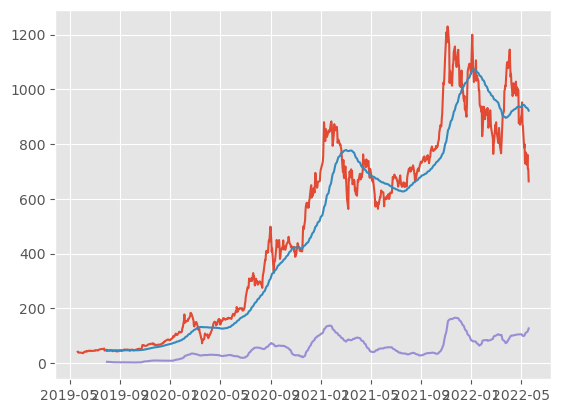

In [186]:
## Plotting the time series, rolling mean and rolling standard deviation together 

plt.plot(df)
rolling_mean = df.rolling(50).mean()
plt.plot(rolling_mean)
rolling_standard_deviation = df.rolling(50).std()
plt.plot(rolling_standard_deviation)

Now from the viasualization we can see an increaing moving average of the time series and a clear upward trend in the time series. So clearly the time series is non-stationary. We can also check the stationarity with the help of Augmented Dicky-Fuller Test.

In [187]:
## Augmented Dicky-Fuller Test

from statsmodels.tsa.stattools import adfuller

adft = adfuller(df)

In [188]:
adft

(-1.36300858170375,
 0.5998762543050691,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [189]:
pd.Series(adft[0:4], index=['test statistic', 'p-value', 'lag', 'data points'])

test statistic     -1.363009
p-value             0.599876
lag                 9.000000
data points       748.000000
dtype: float64

The p-value is greater than 0.05. So we accept the null-hypothesis which is, 'the time series is non-stationary'. So we have to transform the non-stationary time series data to a stationary time series data. 

In [191]:
## Decomposition of the time series data

from statsmodels.tsa.seasonal import seasonal_decompose
output = seasonal_decompose(df, period = 12)
output.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

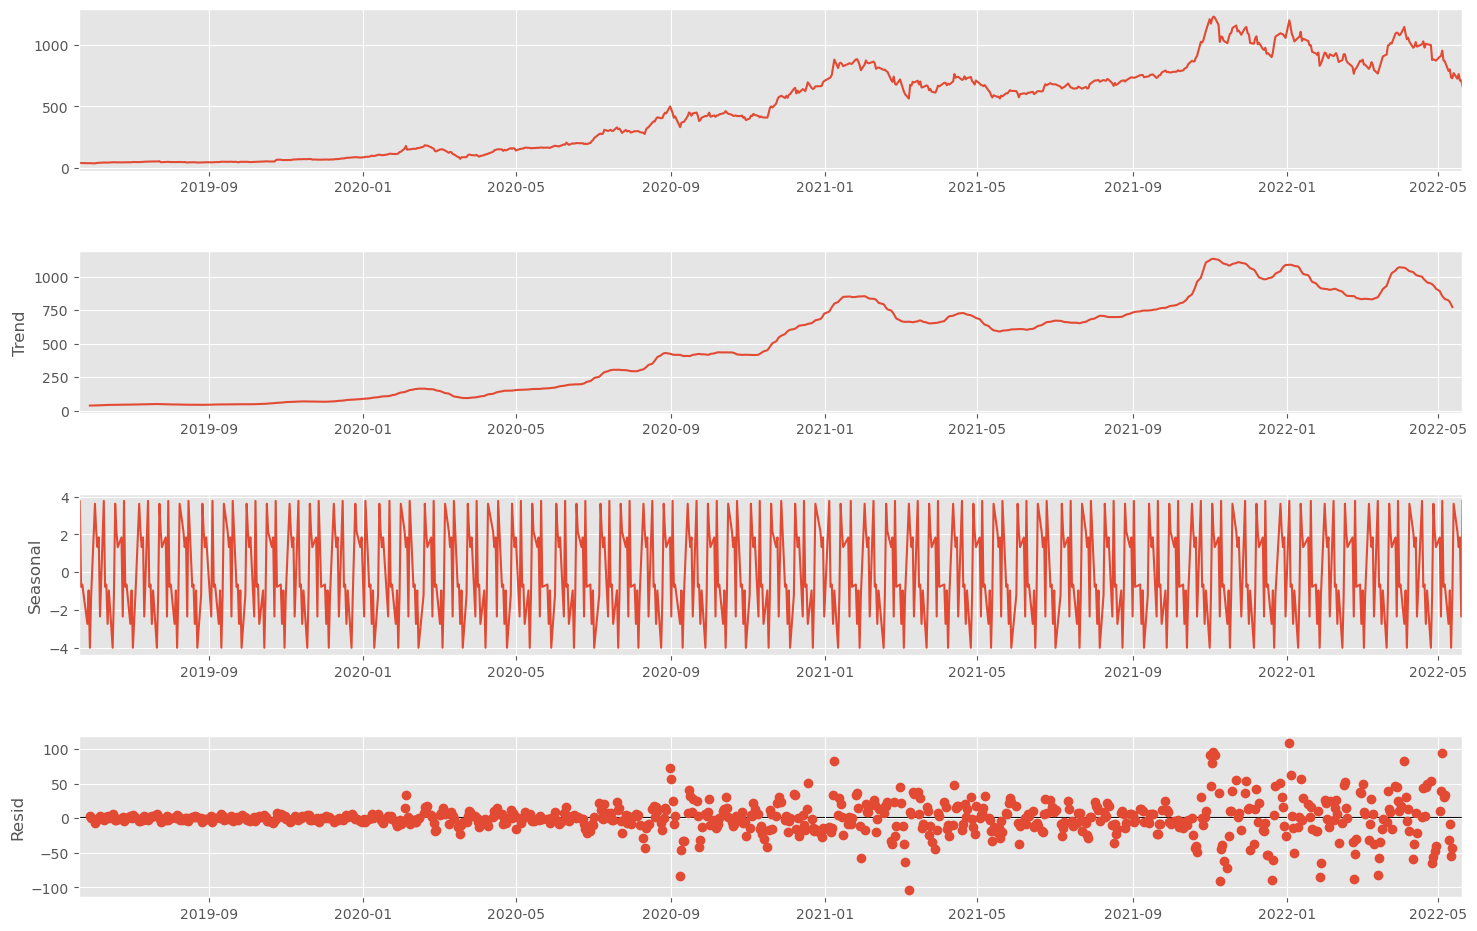

In [193]:
fig=plt.figure(figsize=(20,10))
fig=output.plot()
fig.set_size_inches(17,10)

<AxesSubplot: >

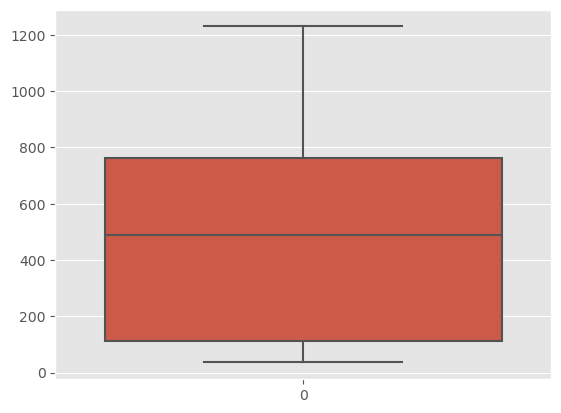

In [195]:
## Detect the outliers

sns.boxplot(df['Close'])

So we have no outliers in the dataset. 

#### Converting the non-stationary time series to a stationary time series 

In [236]:
data = df.Close

In [237]:
data

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [238]:
## First-Order Differencing 

data = data.diff()

In [239]:
data

Date
2019-05-21          NaN
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 758, dtype: float64

In [240]:
data = data.dropna()

In [241]:
## Time Series with lag 1
data

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

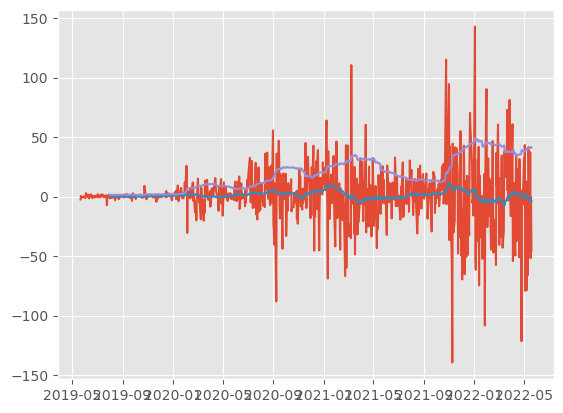

In [242]:
## Checking whether the above series is stationary 

plt.plot(data)
rolling_mean = data.rolling(50).mean()
plt.plot(rolling_mean)
rolling_standard_deviation = data.rolling(50).std()
plt.plot(rolling_standard_deviation)

In [243]:
adft = adfuller(data)
pd.Series(adft[0:4], index=['test statistic', 'p-value', 'lag', 'data points'])

test statistic   -8.324564e+00
p-value           3.498786e-13
lag               8.000000e+00
data points       7.480000e+02
dtype: float64

So we can see that after performing the first-order differencing, the time series 'Data' which is of lag 1 is stationary. So we can use this lagged time series for our model building. 

In [232]:
## We can also perform Second-Order Differencing 

data1 = df.Close
data1 = data1.diff(2)
data1

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23    -1.917999
2019-05-24    -0.420002
2019-05-28    -1.357998
                ...    
2022-05-16    -3.630005
2022-05-17    -7.980042
2022-05-18   -14.559998
2022-05-19   -52.190002
2022-05-20   -45.909973
Name: Close, Length: 758, dtype: float64

However, we do not need Second-Order differencing

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


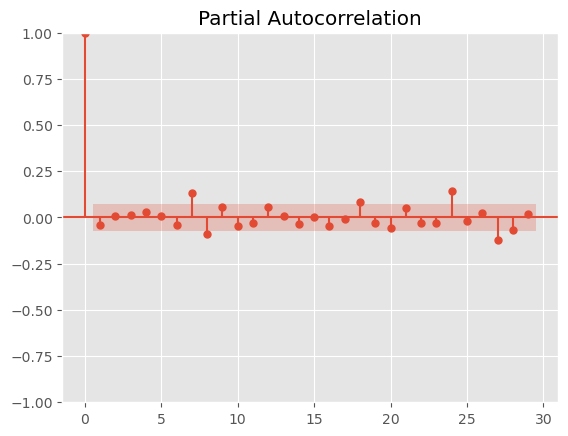

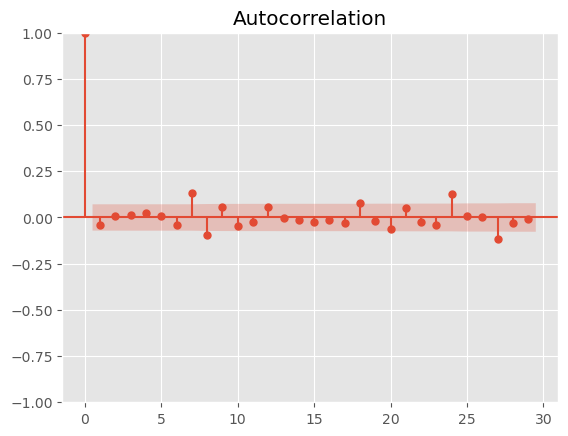

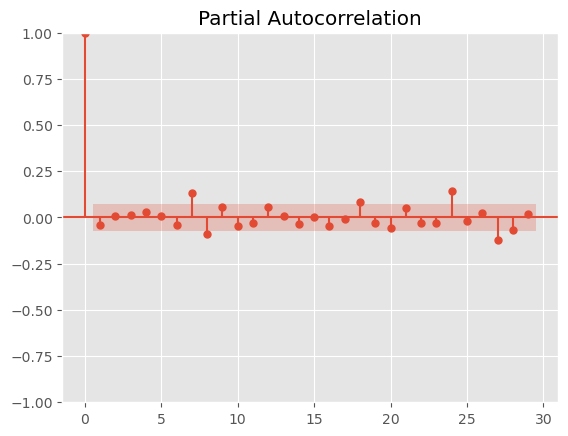

In [244]:
## Plotting the ACF and PACF with the lagged time series

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plot_pacf(data)

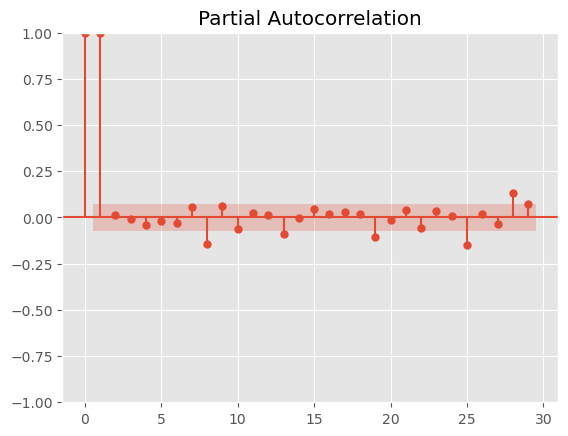

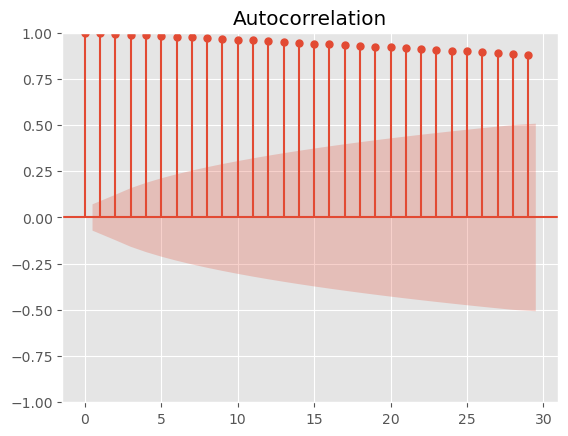

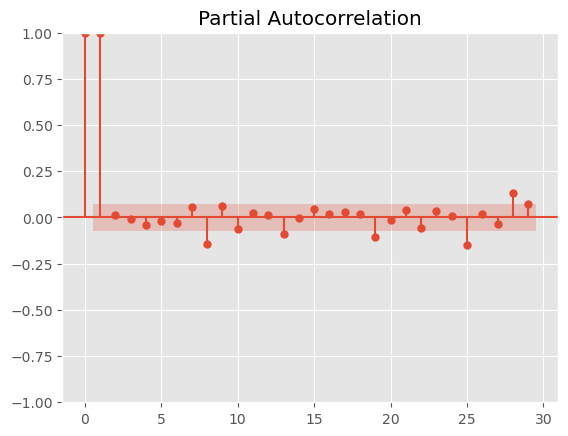

In [245]:
## ACF and PACF with the actual time-series

plot_acf(df)
plot_pacf(df)